# Smoking Cessation Model in ASDM

By Matt Stammers and Wang Zhao

- This is a recreation of the training Smoking Cessation model in ASDM.
- Version 1.1

It is not quite working yet due to a missing function (INIT) but it is very close.

You will need to install the dependencies as per the requirements.txt file for it to work properly. This should take a few minutes. Remember to run it in a virtual environment to avoid any conflicts

In [1]:
# Import key dependencies

from ASDM.Engine import Structure
from ASDM.Utilities import plot_time_series
from IPython.display import Image

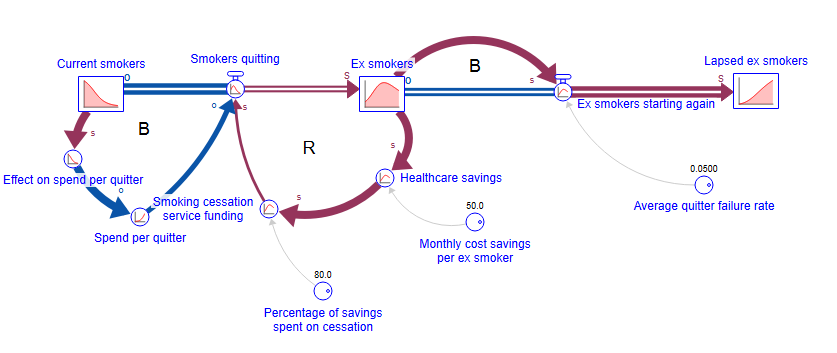

In [2]:
# Show image of final result

Image('Smoking_Cessation_Model.png')

In [5]:
# Add Variables to the Smoking Cessation SD Class object

class SmokingCessation(Structure):
    def __init__(self):
        super(SmokingCessation, self).__init__()
        self.add_stock("currentSmokers", 900)
        self.add_stock("exSmokers", 100)
        self.add_stock("lapsedExSmokers", 0)
        self.add_flow("smokersQuitting", "smokingCessationServiceFunding/spendPerQuitter", flow_from='currentSmokers', flow_to="exSmokers")        
        self.add_flow("exSmokersStartingAgain", "exSmokers*averageQuitterFailureRate", flow_from='exSmokers', flow_to="lapsedExSmokers")
        self.add_aux("effectOnSpendPerQuitter", "currentSmokers")
        self.add_aux("spendPerQuitter", "200/effectOnSpendPerQuitter")
        self.add_aux("percentageOfSavingsSpentOnCessation", 80)                
        self.add_aux("averageQuitterFailureRate", 0.05)
        self.add_aux("healthcareSavings", "exSmokers*monthlyCostSavingsPerExSmoker")
        self.add_aux("smokingCessationServiceFunding", "healthcareSavings*percentageOfSavingsSpentOnCessation/100")
        self.add_aux("monthlyCostSavingsPerExSmoker", 50)

In [6]:
# Create an instance of the model

smoking_model = SmokingCessation()
smoking_model.clear_last_run()
smoking_model.simulate(simulation_time=36, dt=0.25)

Engine: adding element: currentSmokers equation: 900
Engine: adding element: exSmokers equation: 100
Engine: adding element: lapsedExSmokers equation: 0
Engine: adding element: smokersQuitting equation: smokingCessationServiceFunding/spendPerQuitter
Engine: adding element: exSmokersStartingAgain equation: exSmokers*averageQuitterFailureRate
Engine: adding element: effectOnSpendPerQuitter equation: currentSmokers
Engine: adding element: spendPerQuitter equation: effectOnSpendPerQuitter/200
Engine: adding element: percentageOfSavingsSpentOnCessation equation: 80
Engine: adding element: averageQuitterFailureRate equation: 0.05
Engine: adding element: healthcareSavings equation: exSmokers*monthlyCostSavingsPerExSmoker
Engine: adding element: smokingCessationServiceFunding equation: healthcareSavings*percentageOfSavingsSpentOnCessation/100
Engine: adding element: monthlyCostSavingsPerExSmoker equation: 50


,currentSmokers,exSmokers,lapsedExSmokers,smokersQuitting,exSmokersStartingAgain,effectOnSpendPerQuitter,spendPerQuitter,percentageOfSavingsSpentOnCessation,averageQuitterFailureRate,healthcareSavings,smokingCessationServiceFunding,monthlyCostSavingsPerExSmoker
0,900.000000,100.000000,0.000000,888.888889,5.000000,900.000000,4.500000,80,0.05,5.000000e+03,4.000000e+03,50
1,677.777778,320.972222,1.250000,3788.524590,16.048611,677.777778,3.388889,80,0.05,1.604861e+04,1.283889e+04,50
2,-269.353370,1264.091217,5.262153,-37544.470837,63.204561,-269.353370,-1.346767,80,0.05,6.320456e+04,5.056365e+04,50
3,9116.764339,-8137.827632,21.063293,-7140.978821,-406.891382,9116.764339,45.583822,80,0.05,-4.068914e+05,-3.255131e+05,50
4,10902.009045,-9821.349492,-80.659552,-7207.001537,-491.067475,10902.009045,54.510045,80,0.05,-4.910675e+05,-3.928540e+05,50
...,...,...,...,...,...,...,...,...,...,...,...,...
140,187471.851213,-77687.756421,-108784.094792,-3315.175304,-3884.387821,187471.851213,937.359256,80,0.05,-3.884388e+06,-3.107510e+06,50
141,188300.645039,-77545.453292,-109755.191747,-3294.537978,-3877.272665,188300.645039,941.503225,80,0.05,-3.877273e+06,-3.101818e+06,50
142,189124.279533,-77399.769620,-110724.509914,-3274.027843,-3869.988481,189124.279533,945.621398,80,0.05,-3.869988e+06,-3.095991e+06,50
143,189942.786494,-77250.779460,-111692.007034,-3253.644148,-3862.538973,189942.786494,949.713932,80,0.05,-3.862539e+06,-3.090031e+06,50


In [ ]:
# Export the Simulation Results

df_smoking_outcome = smoking_model.export_simulation_result()
df_smoking_outcome

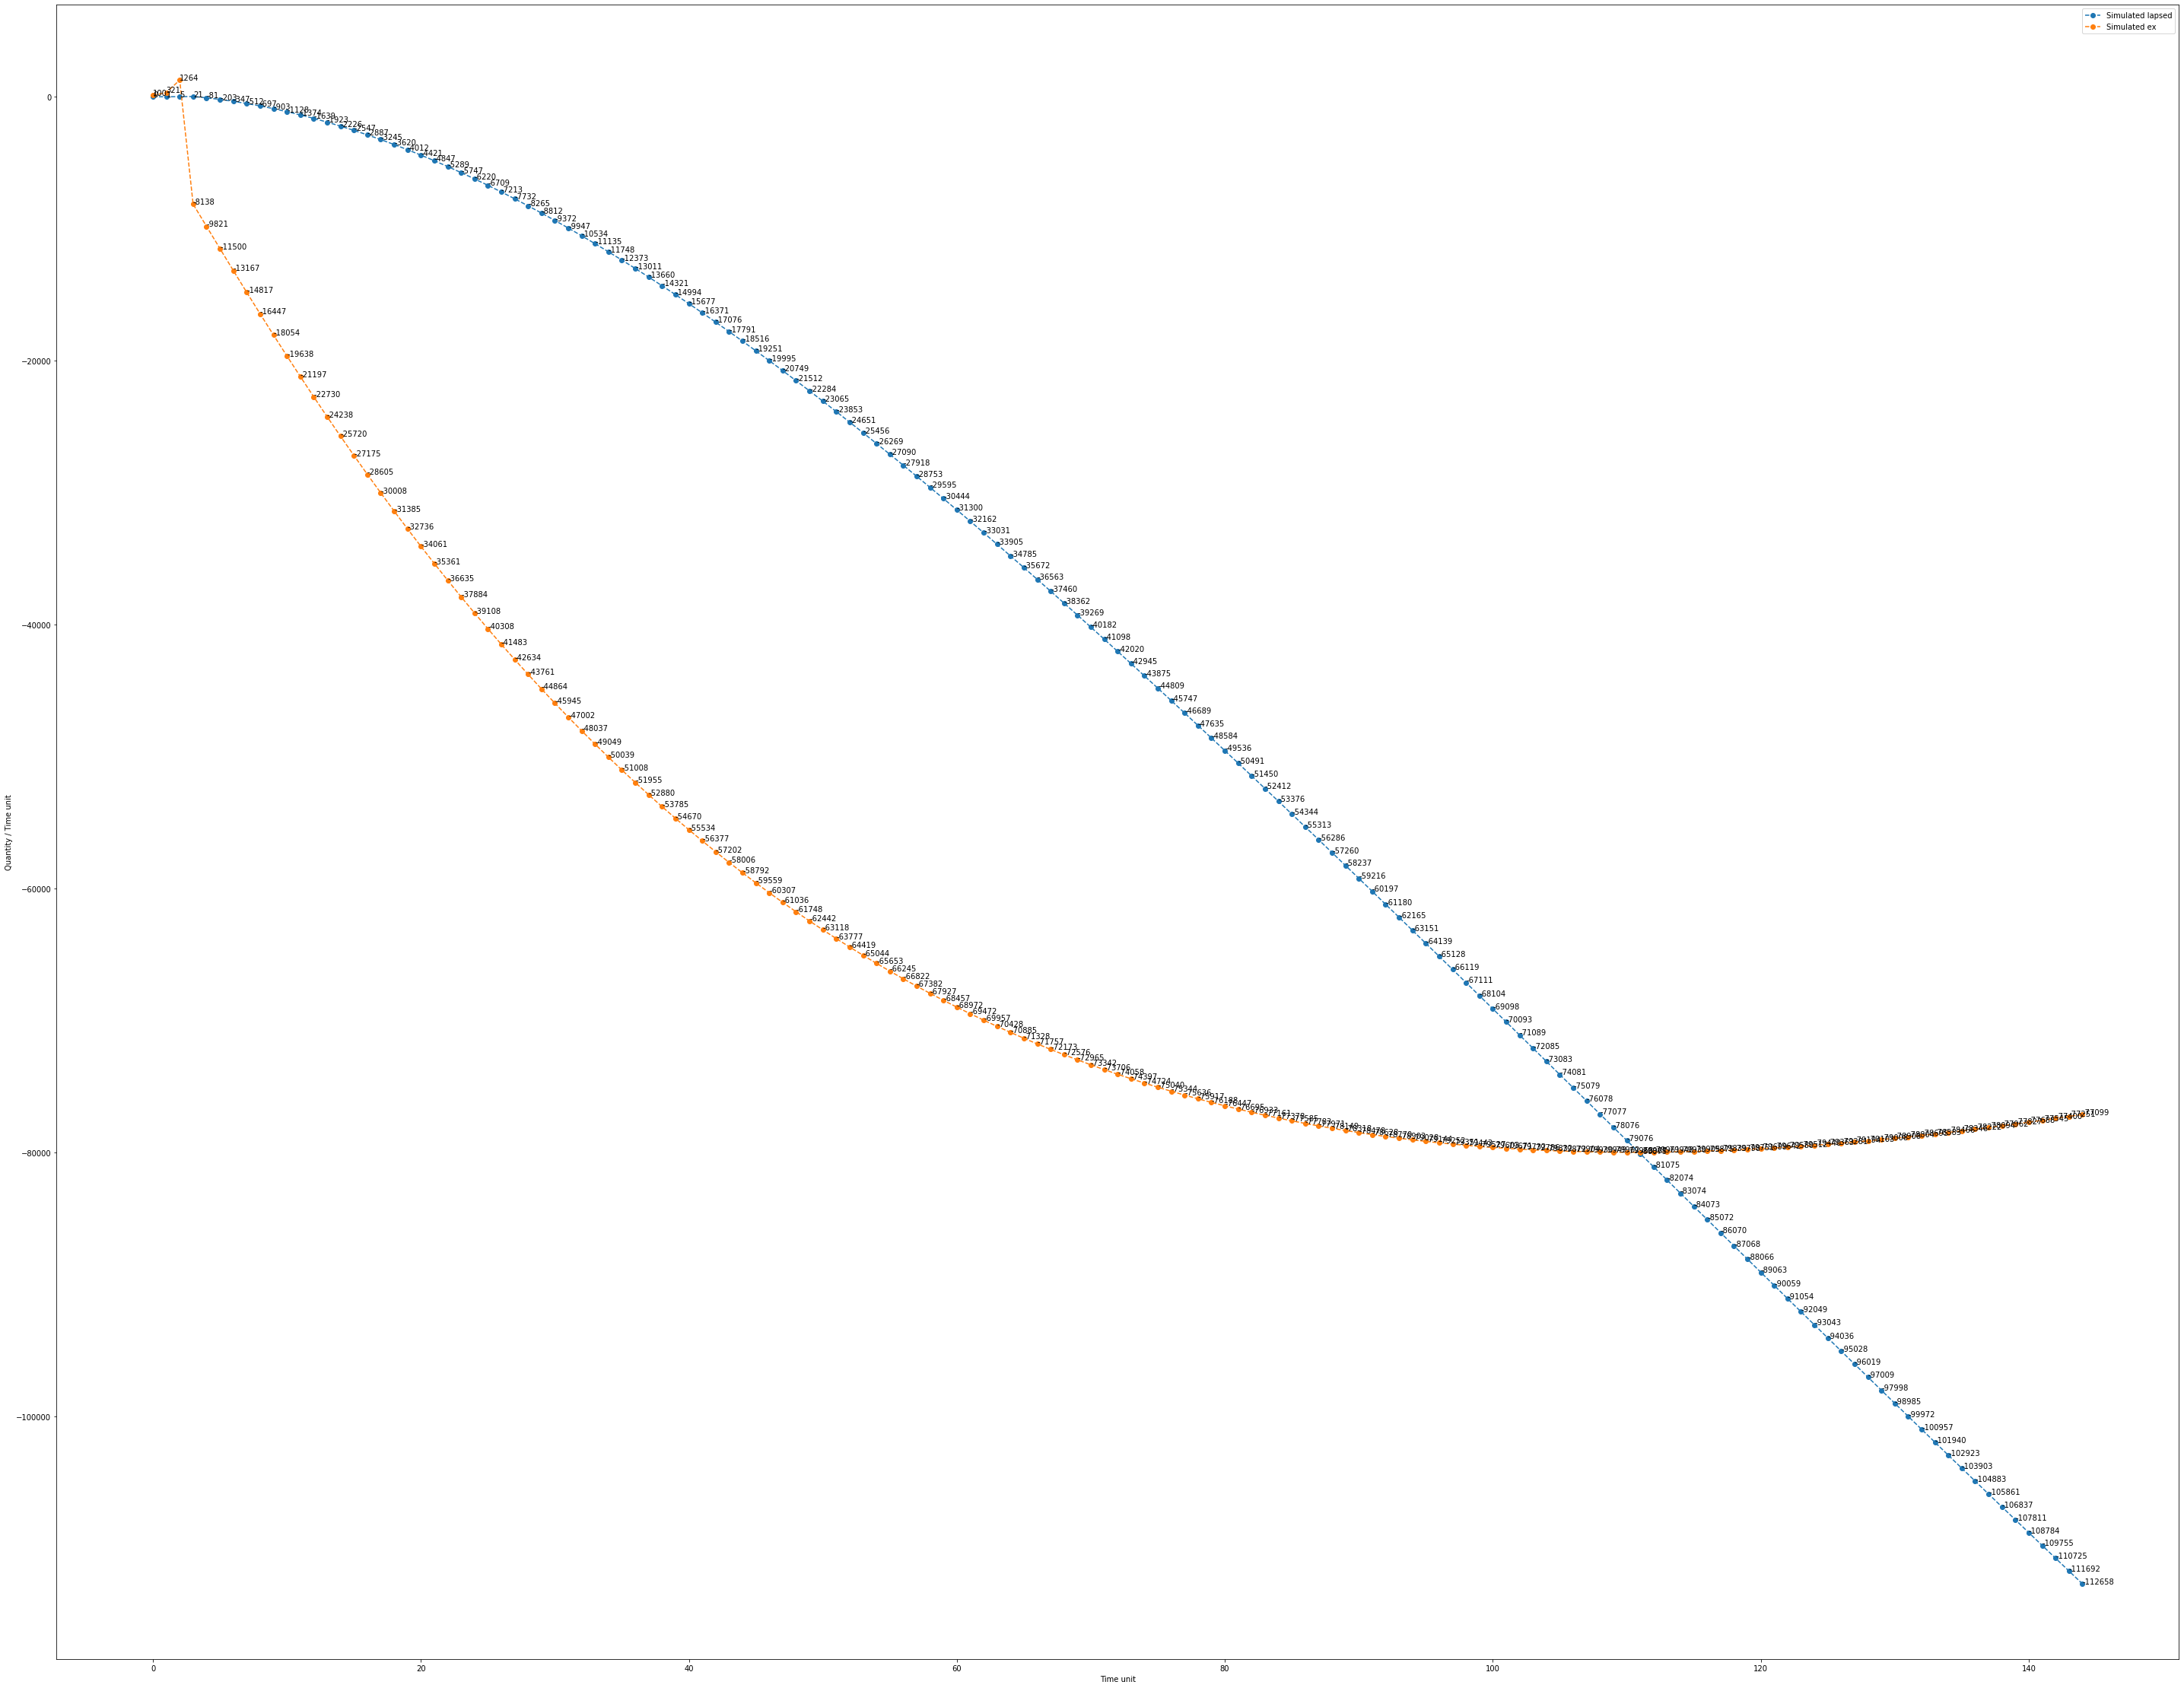

In [7]:
# Plot the time series output

plot_time_series({
    "lapsed":{"Simulated": df_smoking_outcome['lapsedExSmokers']},
    "ex":{"Simulated": df_smoking_outcome['exSmokers']},
}, separate_ax=False)